# Example if call LibRadTran from the notebook
=======================================================================

- Sylvie Dagoret-Campagne
- update 15 May 2018



Simple test to call on-line libradtran to check if it is working

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os

In [36]:
from scipy.interpolate import interp1d

In [37]:
from librtsimana import *
from libsimulateTranspCTIOScattAbsAer import *

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
airmasses=np.linspace(1.,2.,20.)
pressure = 782.5
pwv=4.0
aer=0
ozone=300.

/Users/dagoret/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [40]:
NBOBS=len(airmasses)

In [41]:
all_transmission=np.zeros((NBWL,NBOBS))

In [42]:
idx=0
for am in airmasses:
    path,thefile=ProcessSimulationaer(am,pwv,ozone,aer,pressure) 
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1]  
    func=interp1d(wl,atm,kind='linear') 
    transm=func(WL)
    all_transmission[:,idx]=transm
    idx+=1

In [43]:
thetitle='Atmospheric attenuation 400-600 nm'

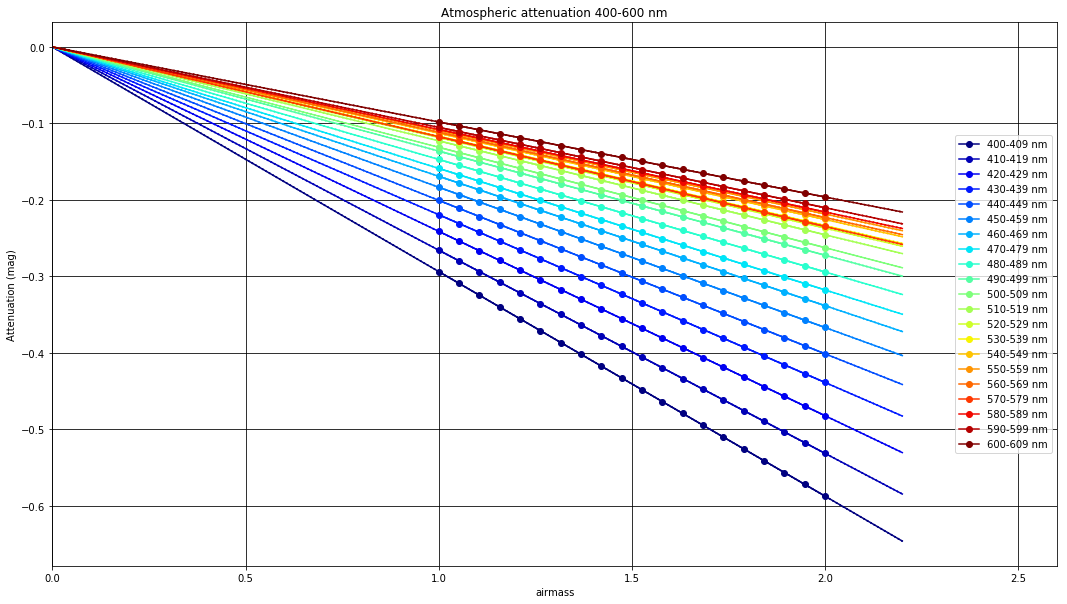

In [44]:
x1,y1,err1=FitAttenuationSmoothBin(airmasses,all_transmission,thetitle,ZMIN=400.,ZMAX=600.,Wwidth=11,Bwidth=10,Mag=True)

In [45]:
thetitle='Atmospheric attenuation 600-1000 nm'

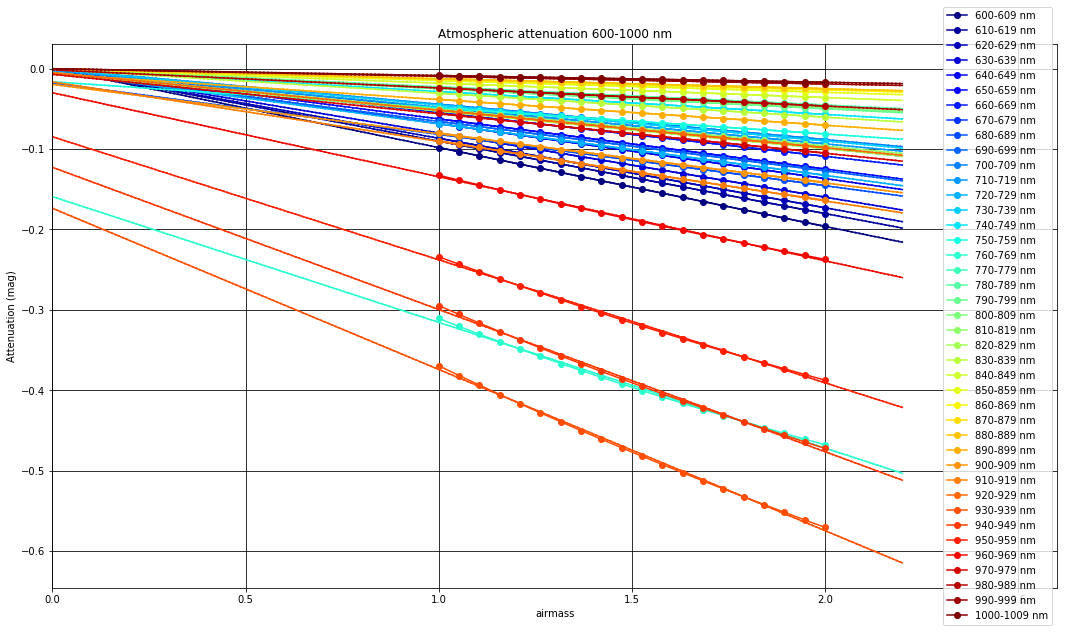

In [46]:
x2,y2,err2=FitAttenuationSmoothBin(airmasses,all_transmission,thetitle,ZMIN=600.,ZMAX=1000.,Wwidth=11,Bwidth=10,Mag=True)

In [47]:
wl=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))
err=np.zeros(len(y))

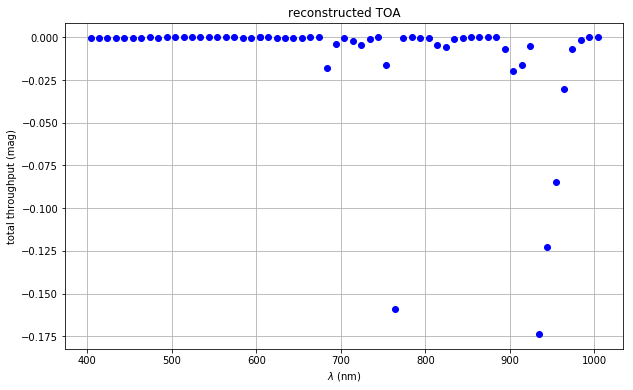

In [48]:
PlotOpticalThroughput(wl,y,err,"reconstructed TOA")